In [2]:
from sage.graphs.graph_generators import graphs

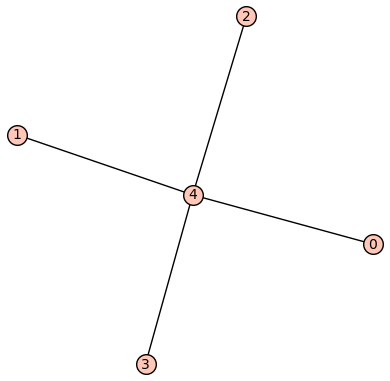

2.0


In [5]:
gen = (G for G in graphs.nauty_geng('5 4:4 -c')) # dvodelni grafi brez štirikotnikov na 10 vozliščih z največ 20 povezavami in najmanjšo stopnjo vsaj 2
#next(gen)
#next(gen)
#next(gen)
#next(gen)
#next(gen)
#next(gen)
j=next(gen)
j.show()


def mnozica_parov_funkcija(graf):
    X=graf.vertices(sort=True)
    a=[]
    for i in X:
        for j in X:
            if j>i:
                a.append((i,j))
            else:
                continue
    return(a)

mnozica_parov=mnozica_parov_funkcija(j)

#naj bi bil linearni program, kjer iscemo maksimum, y pa je spremenljivka
def linearni_program(graf, mnozica_parov):
    vozlisca=graf.vertices(sort=True)
    matrika=[]
    #matrika za a(p,v)
    for v in vozlisca:
        a={"vozlisce":v}
        for par in mnozica_parov:
            if graf.distance(par[0],v)==graf.distance(par[1],v):
                a[par]=0
            else:
                a[par]=1
        matrika.append(a)
    #print(matrika)
    #print(matrika[1])

    p = MixedIntegerLinearProgram(maximization = True)
    y = p.new_variable(binary = True)
    

    #ta funkcija katere maksimum iscemo
    p.set_objective( sum([y[p] for p in mnozica_parov]))
    i=0
    
    #dodajamo pogo za vsako vozlisce grafa posebaj
    for v in graf.vertices():
        vektor=matrika[i]
        del vektor['vozlisce']
        #print(vektor)
        p.add_constraint(sum(vektor[p]*y[p] for p in mnozica_parov) <= 1)
        i=i+1
    vrednost=p.solve()
    #b = p.get_values(y)
    return(vrednost)

m=linearni_program(j,mnozica_parov)
print(m)

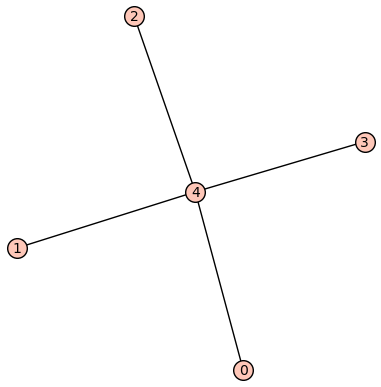

In [6]:
gen = (G for G in graphs.nauty_geng('5 4:4 -c'))
a = next(gen)
a.show()

dimenzija


In [43]:
#g je nek graf, bolj za preizkusanje algoritma kot ne, ce se spreminja, bi naj bili drugacni rezultati
g = graphs.DiamondGraph()
n= g.order()
vozlisca=g.vertices(sort=True)
X=Set(g.vertices(sort=True))

#pari razlicnih vozlisc
Vp=list(X.subsets(2))

#mnozica vozlisc ki razresi par 
def mnozica_raz_voz(v):
    a=v
    b=[]
    for j in vozlisca:
        if g.distance(a[0],j)!=g.distance(a[1],j):
            b.append(j)
        else:
            b=b
    return(b)   

#vse podmnozice vozlisc
podmnozice_vozlisc=list(X.subsets())


#kdaj mnozica razresi par 
#vrne katera vozlisca so skupna dani mnozici in mnozici, ki razresi par
#torej se vrne prazen seznam, ta mnozica ne razresi par
def mnozica_razresi_par(par, mnozica):
    lst3 = [value for value in par if value in mnozica]
    return(lst3)


#preveranje ali drzi za mnozico
def mnozice_za_dim(g):
    vozlisca=g.vertices(sort=True)
    X=Set(g.vertices(sort=True))
    Vp=list(X.subsets(2))
    podmnozice_vozlisc=list(X.subsets())
    razresujoce_mnozice=[]
    for podmnozica in podmnozice_vozlisc:
        #za vsak par vozlisc
        ali_razresi=[]
        i=0
        #za vsako par vozlisc preveri če ima z mnozico ki razresi par kaksno skupno vozlisce
        #ce ima da 1 sicer 0
        #ce je 1 toliko kot je vezlisc potem je ok, in je mnozica razresujoca sicer ne
        for par in Vp:
            if len(mnozica_razresi_par(par, podmnozica))>0:
                ali_razresi.append(1)
                i=i+1            
            else:
                ali_razresi.append(0)
                i=i+1
        if sum(ali_razresi)==len(Vp):
            razresujoce_mnozice.append(podmnozica)
    #vrne vse razesujoce mnozice
    return(razresujoce_mnozice)


S=mnozice_za_dim(g)
print(S)

#vrne velikost najmanjse razresujoce mnozice
def dimenzija(seznam):
    c=[]
    for i in seznam:
        c.append(len(i))
    return(min(c))   
     
print(dimenzija(S))
print(Vp)
x=Vp[0]
print(x)
print(x[1])
              
        


[{0, 1, 2}, {0, 1, 3}, {0, 2, 3}, {1, 2, 3}, {0, 1, 2, 3}]
3
[{0, 1}, {0, 2}, {0, 3}, {1, 2}, {1, 3}, {2, 3}]
{0, 1}
1


Za skupino 2 je rezultat:
Graf, ki nima razlike je:


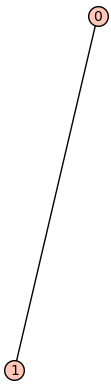

Minimalna vrednost mi: 1.0
Maksimalna vrednost mi 1.0
Prikaz grafov:


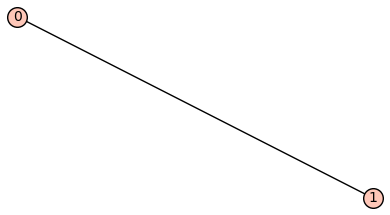

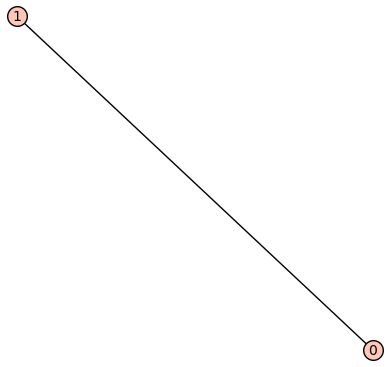

Minimalna razlika mi: 0.0
Maksmalna razlika: 0.0
Prikaz grafov:


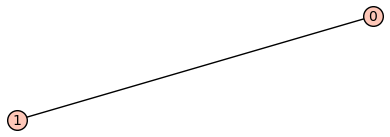

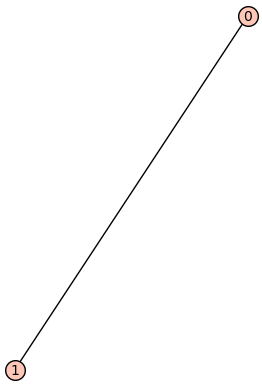

######################################################################################################################################
Za skupino 3 je rezultat:
Minimalna vrednost mi: 1.0
Maksimalna vrednost mi 1.0
Prikaz grafov:


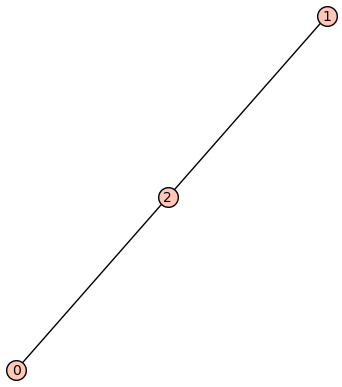

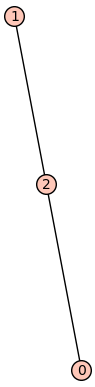

Minimalna razlika mi: 1.0
Maksmalna razlika: 1.0
Prikaz grafov:


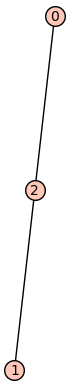

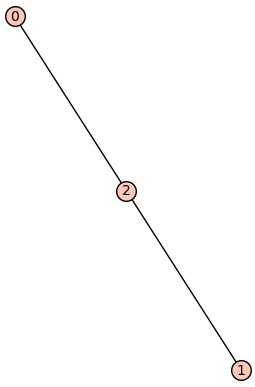

######################################################################################################################################
Za skupino 4 je rezultat:
Minimalna vrednost mi: 1.0
Maksimalna vrednost mi 1.0
Prikaz grafov:


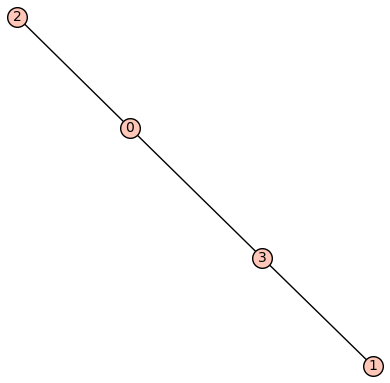

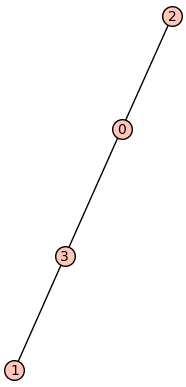

Minimalna razlika mi: 2.0
Maksmalna razlika: 2.0
Prikaz grafov:


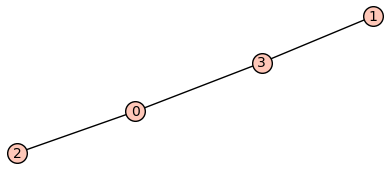

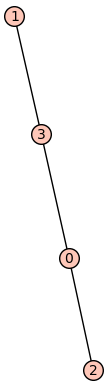

######################################################################################################################################
Za skupino 5 je rezultat:
Minimalna vrednost mi: 1.0
Maksimalna vrednost mi 2.0
Prikaz grafov:


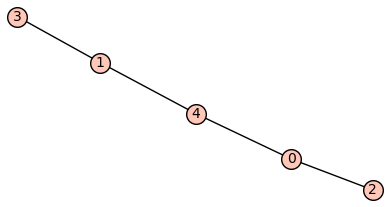

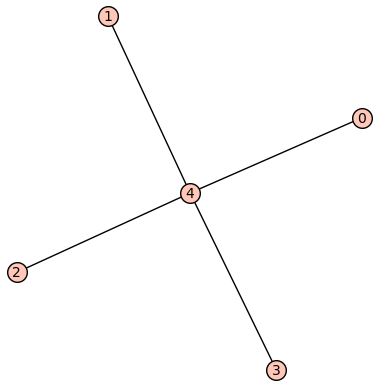

Minimalna razlika mi: 2.0
Maksmalna razlika: 3.0
Prikaz grafov:


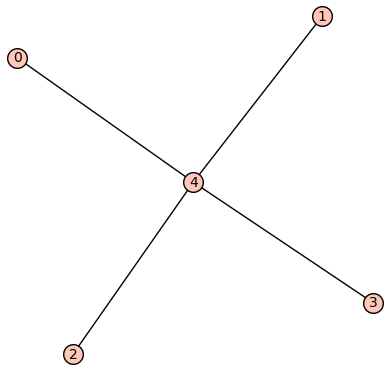

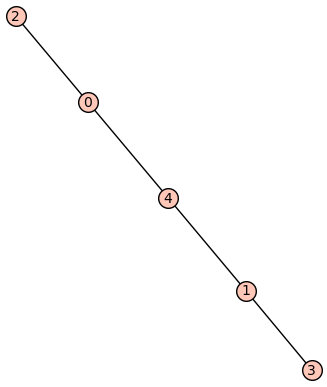

######################################################################################################################################
Za skupino 6 je rezultat:
Minimalna vrednost mi: 1.0
Maksimalna vrednost mi 2.0
Prikaz grafov:


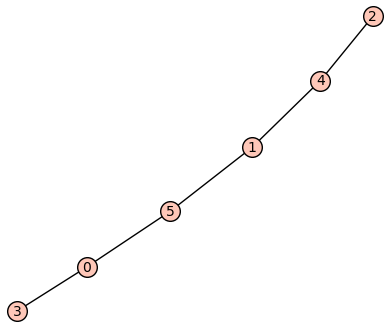

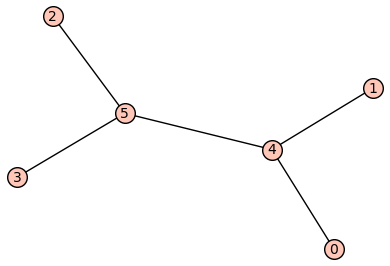

Minimalna razlika mi: 3.0
Maksmalna razlika: 4.0
Prikaz grafov:


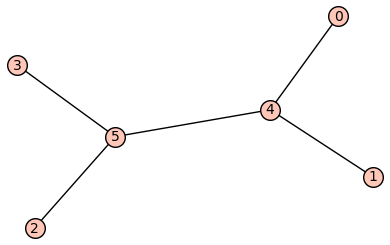

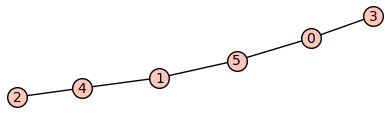

######################################################################################################################################
Za skupino 7 je rezultat:


Minimalna vrednost mi: 1.0
Maksimalna vrednost mi 3.0
Prikaz grafov:


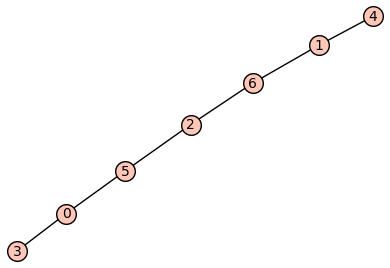

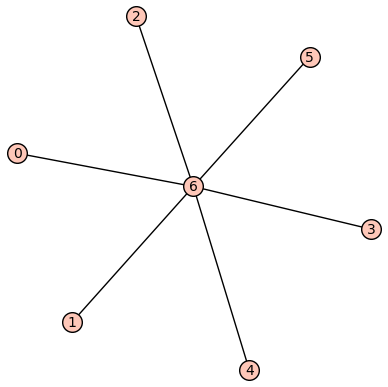

Minimalna razlika mi: 3.0
Maksmalna razlika: 5.0
Prikaz grafov:


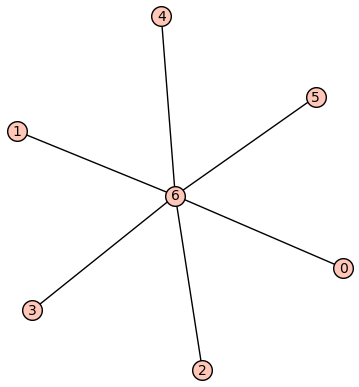

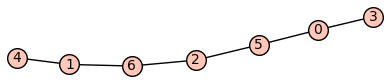

######################################################################################################################################
Za skupino 8 je rezultat:


Minimalna vrednost mi: 1.0
Maksimalna vrednost mi 3.0
Prikaz grafov:


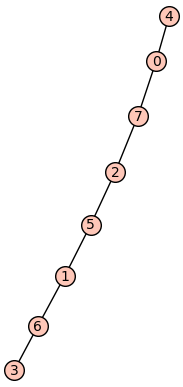

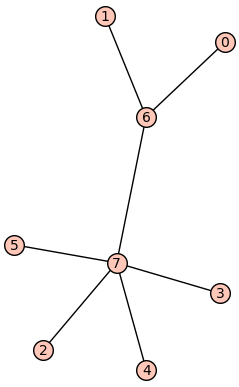

Minimalna razlika mi: 4.0
Maksmalna razlika: 6.0
Prikaz grafov:


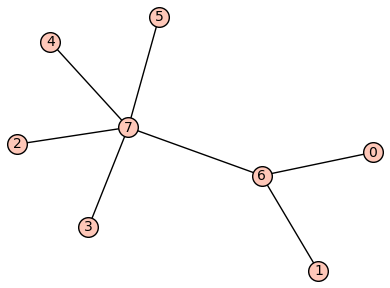

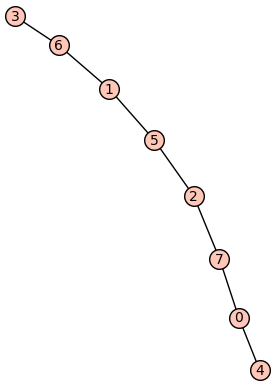

######################################################################################################################################
Za skupino 9 je rezultat:


Minimalna vrednost mi: 1.0
Maksimalna vrednost mi 4.0
Prikaz grafov:


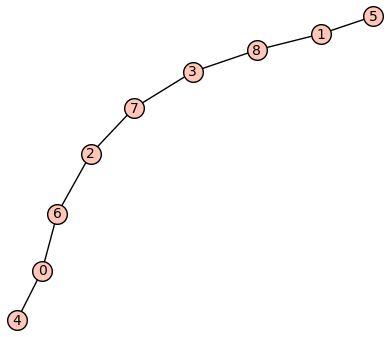

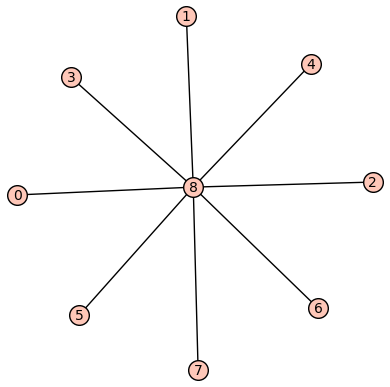

Minimalna razlika mi: 4.0
Maksmalna razlika: 7.0
Prikaz grafov:


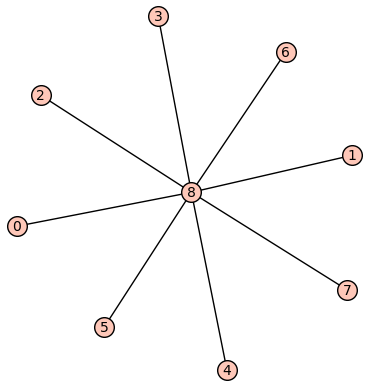

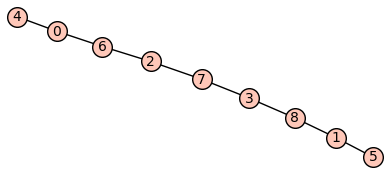

######################################################################################################################################
Za skupino 10 je rezultat:


Minimalna vrednost mi: 1.0
Maksimalna vrednost mi 4.0
Prikaz grafov:


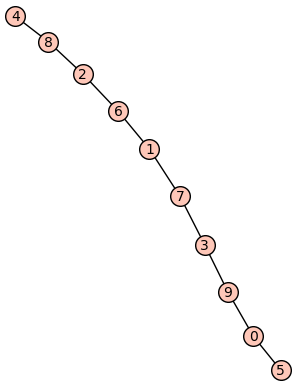

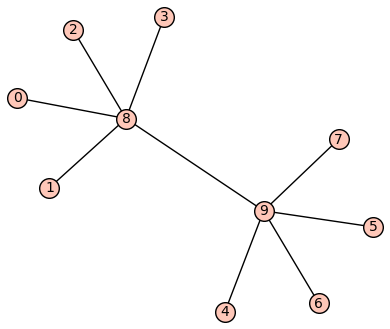

Minimalna razlika mi: 5.0
Maksmalna razlika: 8.0
Prikaz grafov:


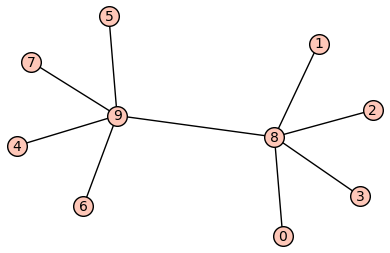

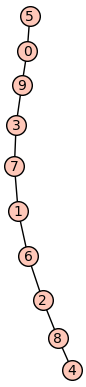

######################################################################################################################################


In [48]:
def max_min(skupina):
    gen = (G for G in graphs.nauty_geng(f'{i} {i-1}:{i-1} -c'))
    a = next(gen)
    min_mi = 1000
    max_mi = -1
    min_razlika = 1000
    max_razlika = -1
    while a != 0:
        dimen = dimenzija(mnozice_za_dim(a))
        pari = mnozica_parov_funkcija(a)
        mi = linearni_program(a, pari)
        razlika = dimen-mi
        if razlika == 0:
            print("Graf, ki nima razlike je:")
            a.show()
        
        min_razlika = min(min_razlika, razlika)
        if(min_razlika==razlika): graf_min_razlika = a
        max_razlika = max(max_razlika, razlika)
        if(max_razlika==razlika): graf_max_razlika = a
        
        min_mi = min(min_mi, mi)
        if(min_mi==mi): graf_min = a
        max_mi = max(max_mi, mi)
        if(max_mi==mi): graf_max = a
        a = next(gen, 0)
    print("Minimalna vrednost mi:", min_mi)
    print("Maksimalna vrednost mi", max_mi)
    print("Prikaz grafov:")
    graf_min.show()
    graf_max.show()
    print("Minimalna razlika mi:", min_razlika)
    print("Maksmalna razlika:", max_razlika)
    print("Prikaz grafov:")
    graf_min_razlika.show()
    graf_max_razlika.show()
    
for i in range(2,11):
    print("Za skupino " + str(i) + " je rezultat:")
    max_min(i)
    print("######################################################################################################################################")